In [1]:
# reading data frame
import pandas as pd
import matplotlib.pyplot as plt             

df = pd.read_csv("survey_results_public.csv")

In [2]:
df.shape

(64461, 61)

In [3]:
df.head(5)

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN         13  Monthly        NaN            NaN             Germany   
1   NaN         19      NaN        NaN            NaN      United Kingdom   
2   NaN         15      NaN        NaN            NaN  Russian Federation   
3  25.0         18      NaN        NaN            NaN             Albania   
4  31.0         16      NaN        NaN            NaN       United States   

     CurrencyDesc     ...                       SurveyEase  \
0   European Euro     ...       Neither easy nor difficult   
1  Pound sterling     ...                              NaN   
2             NaN     ...       Neither easy nor difficult   
3    Albanian lek     ...                              NaN   
4             NaN     ...                             Easy   

            SurveyLength Trans  \
0  Appropriate in length    No   
1                    NaN   NaN   
2  Appropriate in length   NaN   
3                    NaN    No   
4              Too short    No   

                                      UndergradMajor WebframeDesireNextYear  \
0  Computer science, computer engineering, or sof...           ASP.NET Core   
1  Computer science, computer engineering, or sof...                    NaN   
2                                                NaN                    NaN   
3  Computer science, computer engineering, or sof...                    NaN   
4  Computer science, computer engineering, or sof...   Django;Ruby on Rails   

     WebframeWorkedWith                             WelcomeChange WorkWeekHrs  \
0  ASP.NET;ASP.NET Core   Just as welcome now as I felt last year        50.0   
1                   NaN  Somewhat more welcome now than last year         NaN   
2                   NaN  Somewhat more welcome now than last year         NaN   
3                   NaN  Somewhat less welcome now than last year        40.0   
4         Ruby on Rails   Just as welcome now as I felt last year         NaN   

  YearsCode YearsCodePro  
0        36           27  
1         7            4  
2         4          NaN  
3         7            4  
4        15            8  

[5 rows x 61 columns]

In [5]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

In [5]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

Country                                          EdLevel  \
0             Germany  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1      United Kingdom     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Russian Federation                                              NaN   
3             Albania  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4       United States     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

  YearsCodePro                                         Employment  Salary  
0           27  Independent contractor, freelancer, or self-em...     NaN  
1            4                                 Employed full-time     NaN  
2          NaN                                                NaN     NaN  
3            4                                                NaN     NaN  
4            8                                 Employed full-time     NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 5 columns):
Country         64072 non-null object
EdLevel         57431 non-null object
YearsCodePro    46349 non-null object
Employment      63854 non-null object
Salary          34756 non-null float64
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


In [7]:
#dropping all rows in the salary column with nan value
df = df[df["Salary"].notnull()]
df.head()

Country                                            EdLevel  \
7    United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
9   United Kingdom    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
10  United Kingdom       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
11           Spain  Some college/university study without earning ...   
12     Netherlands  Secondary school (e.g. American high school, G...   

   YearsCodePro          Employment    Salary  
7            13  Employed full-time  116000.0  
9             4  Employed full-time   32315.0  
10            2  Employed full-time   40070.0  
11            7  Employed full-time   14268.0  
12           20  Employed full-time   38916.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
Country         34756 non-null object
EdLevel         34188 non-null object
YearsCodePro    34621 non-null object
Employment      34717 non-null object
Salary          34756 non-null float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [9]:
#drop all rows that not numbers
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [10]:
df= df[df['Employment']== 'Employed full-time']
df= df.drop('Employment', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
Country         30019 non-null object
EdLevel         30019 non-null object
YearsCodePro    30019 non-null object
Salary          30019 non-null float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [11]:
df.columns

Index(['Country', 'EdLevel', 'YearsCodePro', 'Salary'], dtype='object')

In [12]:
df['Country'].value_counts()

United States                       7569
India                               2425
United Kingdom                      2287
Germany                             1903
Canada                              1178
Brazil                               991
France                               972
Spain                                670
Australia                            659
Netherlands                          654
Poland                               566
Italy                                560
Russian Federation                   522
Sweden                               514
Turkey                               327
Israel                               300
Pakistan                             271
Switzerland                          266
Mexico                               256
Ireland                              253
Norway                               252
Ukraine                              249
Romania                              246
South Africa                         244
Czech Republic  

# Exploratory Data Analysis

In [13]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [14]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

## Outlier Dectection with Boxplot

C:\Users\HUSMAN\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


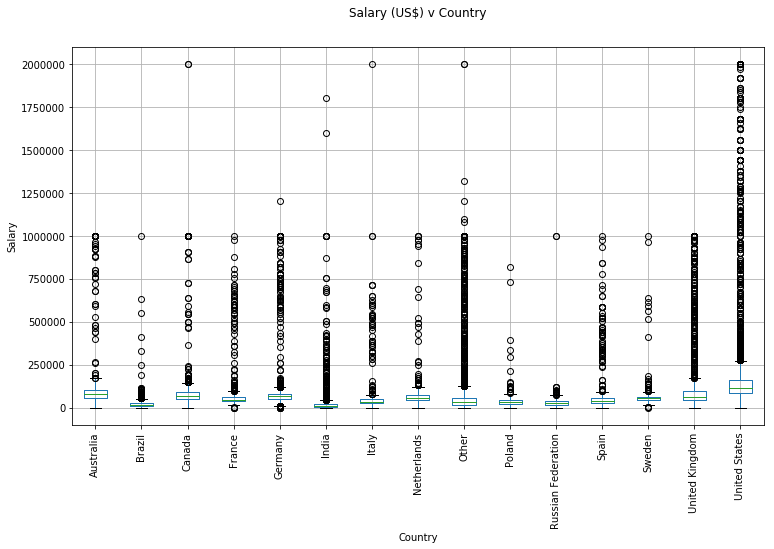

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation= 90)
plt.show();

# Outlier  dectection

In [17]:
upper_limit = df.Salary.mean() + 3*df.Salary.std()
upper_limit

813879.4979841934

In [19]:
lower_limit = df.Salary.mean() -3*df.Salary.std()
lower_limit

-598309.784402795

In [20]:
# viewing outliers
df_with_outliers= df[(df.Salary>upper_limit) | (df.Salary<lower_limit)]
df_with_outliers

Country                                            EdLevel  \
17      United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
56      United States    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
64      United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
121     United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
123     United States         Other doctoral degree (Ph.D., Ed.D., etc.)   
191     United States    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
194     United States    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
279     United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
501     United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
663     United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
683    United Kingdom         Other doctoral degree (Ph.D., Ed.D., etc.)   
722     United States  Some college/university study without earning ...   
816     United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
837     United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
931            Canada    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
935    United Kingdom    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
950             Other       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
982     United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1018    United States    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1032    United States                Associate degree (A.A., A.S., etc.)   
1072    United States    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1113    United States    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1116    United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1124    United States                Associate degree (A.A., A.S., etc.)   
1188    United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1290    United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1296    United States    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1339    United States    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1381    United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1407    United States  Some college/university study without earning ...   
...               ...                                                ...   
60068           Other       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
60079           Other       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
60107           Other    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
60301   United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
60390  United Kingdom  Some college/university study without earning ...   
60438          Canada       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
60474          Canada       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
60478   United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
60582   United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
60656   United States                          Primary/elementary school   
60676   United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
60740   United States         Other doctoral degree (Ph.D., Ed.D., etc.)   
60813   United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
60966   United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
61111  United Kingdom       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
61129  United Kingdom    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
61155           Other  Some college/university study without earning ...   
61220   United States  Some college/university study without earning ...   
61294   United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
61350   United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
61373   United States       Bachelor’s degree (B.A., B.S., B.E

In [21]:
df_with_outliers.shape

(750, 4)

### Removing Outliers and generating new data frame

In [22]:
df_no_outlier = df[(df.Salary<upper_limit) & (df.Salary>lower_limit)]
df_no_outlier.head()

Country                                            EdLevel  \
7    United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
9   United Kingdom    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
10  United Kingdom       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
11           Spain  Some college/university study without earning ...   
12     Netherlands  Secondary school (e.g. American high school, G...   

   YearsCodePro    Salary  
7            13  116000.0  
9             4   32315.0  
10            2   40070.0  
11            7   14268.0  
12           20   38916.0

In [23]:
df_no_outlier.shape

(29269, 4)

## Boxplot after Outlier removal

C:\Users\HUSMAN\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


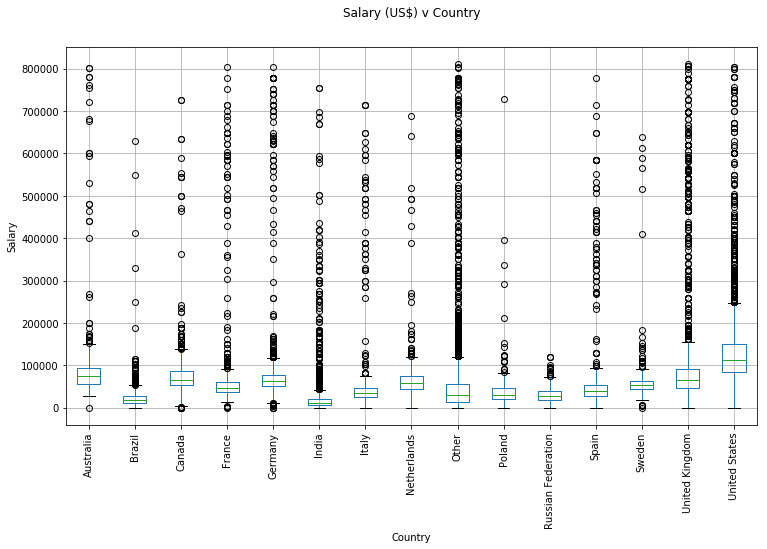

In [24]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df_no_outlier.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

In [25]:
df_no_outlier.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [26]:
df_no_outlier.shape

(29269, 4)

In [27]:
df.shape

(30019, 4)

In [28]:
#dropping all rows in the salary column with nan value
df_no_outlier =df_no_outlier[df_no_outlier["Salary"].notnull()]
df_no_outlier.head()

Country                                            EdLevel  \
7    United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
9   United Kingdom    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
10  United Kingdom       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
11           Spain  Some college/university study without earning ...   
12     Netherlands  Secondary school (e.g. American high school, G...   

   YearsCodePro    Salary  
7            13  116000.0  
9             4   32315.0  
10            2   40070.0  
11            7   14268.0  
12           20   38916.0

In [30]:
df_no_outlier.shape

(29269, 4)

In [31]:
df_no_outlier['Country'].value_counts()

Other                 8442
United States         7168
India                 2417
United Kingdom        2196
Germany               1873
Canada                1130
Brazil                 990
France                 969
Spain                  665
Netherlands            646
Australia              619
Poland                 565
Italy                  557
Russian Federation     520
Sweden                 512
Name: Country, dtype: int64

# Label Encoding

In [32]:
df_no_outlier["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '14', '12', '29', '6',
       '28', '8', '23', '15', '25', 'Less than 1 year', '5', '9', '11',
       '21', '16', '18', '32', '19', '22', '38', '30', '26', '17', '27',
       '24', '33', '34', '35', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49', '47'],
      dtype=object)

In [33]:
#cleaning and transforming the YearsCodePro column 
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df_no_outlier['YearsCodePro'] = df_no_outlier['YearsCodePro'].apply(clean_experience)

In [34]:
df_no_outlier["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 14. , 12. , 29. ,
        6. , 28. ,  8. , 23. , 15. , 25. ,  0.5,  5. ,  9. , 11. , 21. ,
       16. , 18. , 32. , 19. , 22. , 38. , 30. , 26. , 17. , 27. , 24. ,
       33. , 34. , 35. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. , 47. ])

In [35]:
df_no_outlier["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [36]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df_no_outlier['EdLevel'] = df_no_outlier['EdLevel'].apply(clean_education)

In [37]:
df_no_outlier["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [38]:
#Transform EdLevel column to numeric data
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df_no_outlier['EdLevel'] = le_education.fit_transform(df_no_outlier['EdLevel'])
df_no_outlier["EdLevel"].unique()
#le.classes_

array([0, 2, 1, 3], dtype=int64)

In [39]:
#Transform Country column to numeric data
le_country = LabelEncoder()
df_no_outlier['Country'] = le_country.fit_transform(df_no_outlier['Country'])
df_no_outlier["Country"].unique()

array([14, 13, 11,  7,  4,  2,  8,  6,  1,  3,  9,  5, 12,  0, 10],
      dtype=int64)

# Data splitting

In [40]:
 df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29269 entries, 7 to 64154
Data columns (total 4 columns):
Country         29269 non-null int32
EdLevel         29269 non-null int32
YearsCodePro    29269 non-null float64
Salary          29269 non-null float64
dtypes: float64(2), int32(2)
memory usage: 914.7 KB


In [41]:
X = df_no_outlier.drop("Salary", axis=1)
y = df_no_outlier["Salary"]

In [42]:
#dividing data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [43]:
X_train.shape

(23415, 3)

In [44]:
y_train.shape

(23415,)

# Model Bulding

### Linear Regression

In [46]:
#Creating a Linear Regression model
from sklearn.linear_model import LinearRegression
#instantiate
LR = LinearRegression()
#fit
train_Lr= LR.fit(X_train, y_train)
#predict
y_pred_lr= LR.predict(X_test)
# # get cross val scores
# get_cv_scores(train_lr)

### Decision Tree Regression

In [47]:
#Decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
#instantiate
Dt= DecisionTreeRegressor(random_state=42)
#fit
train_dt= Dt.fit(X_train, y_train)
#predict
y_pred_dt= Dt.predict(X_test)


### Random Forest Regression

In [48]:
#Random forest tree model
from sklearn.ensemble import RandomForestRegressor
#instantiate
Rf= RandomForestRegressor(random_state=42)
#fit
train_rf= Rf.fit(X_train, y_train)
#predict
y_pred_rf= Rf.predict(X_test)

# Model Evaluation

In [49]:
# Evaluating Linear Regressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error1 = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print('${:,.2f}'.format(error1))

$87,127.19


In [50]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred_lr), 2)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.11


In [51]:
#Evaluating DecisonTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
error2= np.sqrt(mean_squared_error(y_test, y_pred_dt))
print('${:,.2f}'.format(error2))

$84,942.09


In [52]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred_dt), 2)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.15


In [53]:
# Evaluating RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
error3= np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('${:,.2f}'.format(error3))

$84,790.15


In [54]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred_rf), 2)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.16


### Hence the best ML Algorithm is RANDOM FOREST REGRESSOR. Since the lower the error, the better the model

# Parameters and Hyperparameters Tuning

In [55]:
# Available hyperparameters in 
from pprint import pprint
print('Parameters currently in use:\n')
pprint(Rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [56]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

model = RandomForestRegressor(random_state=0)
gs = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [57]:
model = gs.best_estimator_

model.fit(X_train, y_train)
f_pred = model.predict(X_test)
f_error = np.sqrt(mean_squared_error(y_test, f_pred))
print("${:,.2f}".format(f_error))

$82,920.84


# Predictive System

In [59]:
X.head()

Country  EdLevel  YearsCodePro
7        14        0          13.0
9        13        2           4.0
10       13        0           2.0
11       11        1           7.0
12        7        1          20.0

In [60]:
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 2 ]])
X

array([['United States', 'Master’s degree', '2']], dtype='<U15')

In [61]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[14.,  2.,  2.]])

In [62]:
y_pred= model.predict(X)
y_pred

array([110085.1883909])

# Saving model

In [63]:
import pickle

In [64]:
data = {"model": model, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

### using saved model

In [65]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [66]:
y_pred = regressor_loaded.predict(X)
y_pred

array([110085.1883909])